In [ ]:
# Импорт библиотек
import random
import matplotlib.pyplot as plt
from kaggle_environments import make, evaluate

# Импорт агентов
from rock_agent import rock_agent
from random_agent import random_agent
from copy_agent import copy_agent
from cycle_agent import cycle_agent
from win_stay_agent import win_stay_agent
from always_paper_agent import always_paper_agent
from always_scissors_agent import always_scissors_agent
from counter_previous_agent import counter_previous_agent
from random_biased_agent import random_biased_agent
from least_common_agent import least_common_agent
from mirror_agent import mirror_agent
from adaptive_agent import adaptive_agent
from reverse_agent import reverse_agent

# Создание списка агентов
agents = [
    ("rock_agent", rock_agent),
    ("random_agent", random_agent),
    ("copy_agent", copy_agent),
    ("cycle_agent", cycle_agent),
    ("win_stay_agent", win_stay_agent),
    ("always_paper_agent", always_paper_agent),
    ("always_scissors_agent", always_scissors_agent),
    ("counter_previous_agent", counter_previous_agent),
    ("random_biased_agent", random_biased_agent),
    ("least_common_agent", least_common_agent),
    ("mirror_agent", mirror_agent),
    ("adaptive_agent", adaptive_agent),
    ("reverse_agent", reverse_agent)
]

# Создание среды "Камень-Ножницы-Бумага"
env = make("rps", configuration={"episodeSteps": 100})

# Запуск турнира между агентами и вывод результатов
scores = [0] * len(agents)  # Инициализация списка очков для каждого агента
for i, (name1, agent1) in enumerate(agents):
    for j, (name2, agent2) in enumerate(agents):
        if i < j:  # Чтобы не дублировать пары и не играть агента с самим собой
            rewards = evaluate(
                "rps", [agent1, agent2], configuration={"episodeSteps": 100}, num_episodes=10
            )
            wins_1 = sum([reward[0] for reward in rewards if reward[0] is not None])
            wins_2 = sum([reward[1] for reward in rewards if reward[1] is not None])
            scores[i] += wins_1
            scores[j] += wins_2
            print(f"Игра между {name1} и {name2}:")
            print(f"  Награда {name1}: {wins_1}")
            print(f"  Награда {name2}: {wins_2}")
            print("-" * 30)

# Вывод финальных очков
print("\nФинальные результаты турнира:")
for name, score in zip([name for name, _ in agents], scores):
    print(f"{name}: {score}")

# Визуализация результатов турнира
agents_names = [name for name, _ in agents]

plt.figure(figsize=(10, 6))
plt.bar(agents_names, scores)
plt.xlabel('Агенты')
plt.ylabel('Общий счёт')
plt.title('Результаты турнира между агентами')
plt.xticks(rotation=90)
plt.show()


Игра между rock_agent и random_agent:
  Награда rock_agent: 0
  Награда random_agent: 0
------------------------------
Игра между rock_agent и copy_agent:
  Награда rock_agent: 0
  Награда copy_agent: 0
------------------------------
Игра между rock_agent и cycle_agent:
  Награда rock_agent: 0
  Награда cycle_agent: 0
------------------------------
Игра между rock_agent и win_stay_agent:
  Награда rock_agent: 0
  Награда win_stay_agent: 0
------------------------------
Игра между rock_agent и always_paper_agent:
  Награда rock_agent: -297.0
  Награда always_paper_agent: 297.0
------------------------------
Игра между rock_agent и always_scissors_agent:
  Награда rock_agent: 297.0
  Награда always_scissors_agent: -297.0
------------------------------
Игра между rock_agent и counter_previous_agent:
  Награда rock_agent: -294.0
  Награда counter_previous_agent: 294.0
------------------------------
Игра между rock_agent и random_biased_agent:
  Награда rock_agent: 0
  Награда random_biased

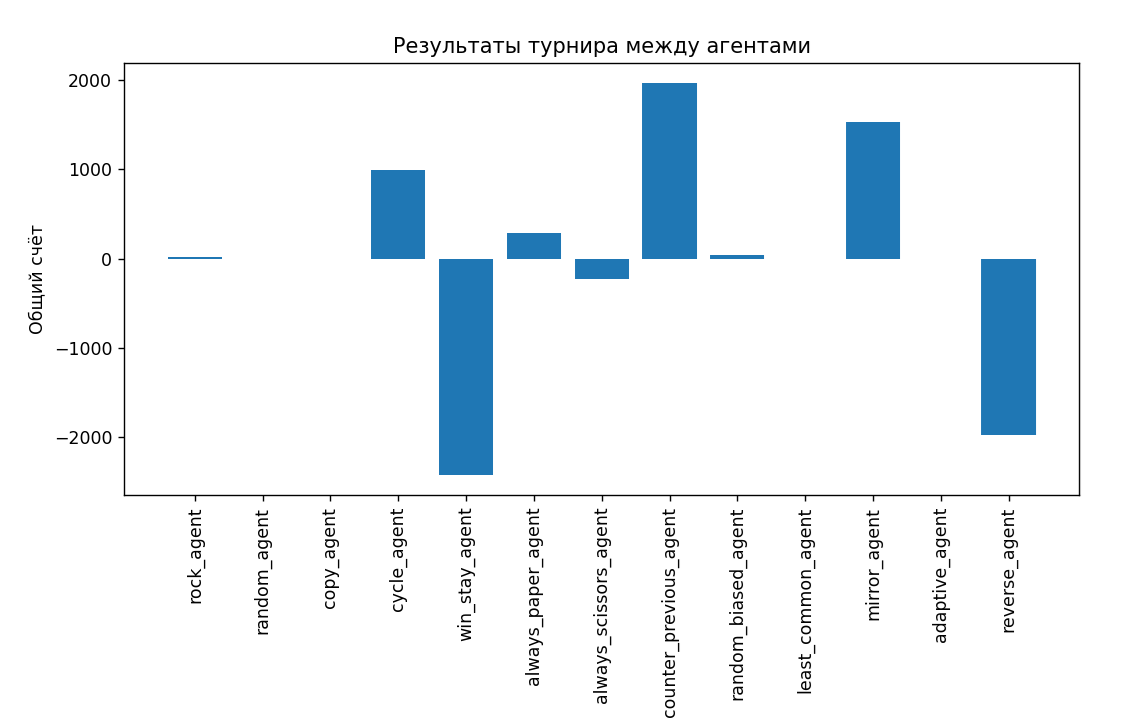

### На основе обновленных результатов турнира, вот основные выводы:

Финальные результаты турнира:
rock_agent: 20.0
random_agent: 52.0
copy_agent: 0.0
cycle_agent: 990.0
win_stay_agent: -2400.0
always_paper_agent: 317.0
always_scissors_agent: -225.0
counter_previous_agent: 1992.0
random_biased_agent: -65.0
least_common_agent: 0
mirror_agent: 1530.0
adaptive_agent: 0
reverse_ agent: -1991.0
#### Наибольшие победы:
- **counter_previous_agent** набрал 1970 очков и является лидером среди агентов.
- **mirror_agent** также показал отличные результаты, набрав 1532 очка.
- **cycle_agent** также проявил себя довольно сильно, с 990 очками.

#### Наибольшие проигрыши:
- **win_stay_agent** потерял 2420 очков, что делает его самым слабым агентом среди всех участников.
- **reverse_agent** также показал слабые результаты, потеряв 1971 очко.
- **always_scissors_agent** также понес значительные потери — -232 очка.

#### Средние результаты:
Некоторые агенты, такие как **rock_agent** (20 очков), **copy_agent** (0 очков), **least_common_agent** (0 очков) и **adaptive_agent** (0 очков), показали более нейтральные результаты, указывающие на стабильную игру, но без явных успехов.

#### Интересные моменты:
- **always_paper_agent** заработал 290 очков, что говорит о неплохой стратегии против некоторых агентов, несмотря на предсказуемую тактику.
- **random_biased_agent** также показал положительный результат с 46 очками, несмотря на свою случайную стратегию.

#### Общий тренд:
Агенты, которые используют адаптивные стратегии, такие как **counter_previous_agent** и **mirror_agent**, продемонстрировали наилучшие результаты, что подтверждает важность адаптации и предсказания поведения соперника в этом турнире.
Агенты с фиксированной стратегией, такие как **win_stay_agent** и **reverse_agent**, показали худшие результаты, что делает их менее эффективными в долгосрочной перспективе против более адаптивных агентов.
"""